### A1 - Building a Recommender System

Freek van Geffen | s2633256 <br>
Justin Kraaijenbrink | s2577984

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import os
import time

In [3]:
filepath = "C:/Users/Justin/Documents/01_Stat_science/Year_2/ADM/data"

In [4]:
os.chdir(filepath)

In [5]:
ratings = pd.read_table('ratings.dat', 
                        sep = '::', 
                        names = ['UserID', 'MovieID', 'Rating', 'Timestamp'],
                        engine = 'python')

users = pd.read_table('users.dat',
                      sep = '::',
                      names = ['UserID', 'Gender', 'Age', 'Occupation', 'ZIPcode'],
                      engine = 'python')

movies = pd.read_table('movies.dat', 
                       sep = '::',
                       names = ['MovieID', 'Title', 'Genres'],
                       engine = 'python')

#### Descriptive statistics for the report

In [11]:
ratings['UserID'].value_counts().describe(); ratings['MovieID'].value_counts().describe()

count    3706.000000
mean      269.889099
std       384.047838
min         1.000000
25%        33.000000
50%       123.500000
75%       350.000000
max      3428.000000
Name: MovieID, dtype: float64

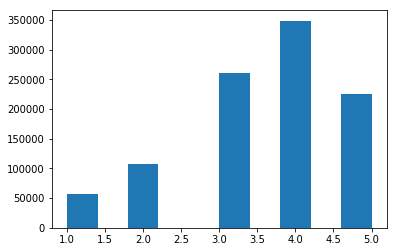

In [23]:
plt.hist(x=np.array(ratings.Rating), bins=10)
plt.show()

#### Global average approach

In [6]:
def global_average(train, test):
    
    avg_global = train.mean(axis=0)[2]
    pred = [avg_global ]*len(test)
    return(pred)

In [16]:
start = time.time()
# prepare cross validation
kfold = KFold(5, shuffle = True, random_state = 2020)
results = np.zeros((5,4))

# enumerate splits
i = 0
for train_index, test_index in kfold.split(ratings):
    pred_train = global_average(ratings.iloc[train_index,:], ratings.iloc[train_index,:])
    pred_test = global_average(ratings.iloc[train_index,:], ratings.iloc[test_index,:])
    
    RMSE_train = np.sqrt(sum((ratings.iloc[train_index, 2] - pred_train)**2)/len(train_index))
    MAE_train = sum(abs(ratings.iloc[train_index, 2] - pred_train))/len(train_index)

    RMSE_test = np.sqrt(sum((ratings.iloc[test_index, 2] - pred_test)**2)/len(test_index))
    MAE_test = sum(abs(ratings.iloc[test_index, 2] - pred_test))/len(test_index)
    
    results[i, 0] = RMSE_train
    results[i, 1] = MAE_train
    results[i, 2] = RMSE_test
    results[i, 3] = MAE_test
    i = i + 1

print(results.mean(0))
end = time.time()
print(end - start)

[1.11710106 0.93386054 1.11710138 0.93386216]
2.147207021713257


#### Movie average approach


In [19]:
def movie_average(train, test):
  
    avg_global = train.mean(axis=0)[2]
    avg_movie = train.groupby("MovieID").mean()['Rating']
    avg_movie = np.vstack((avg_movie.index.values, avg_movie)).T
    dict_movie = dict(avg_movie)
  
    pred = []
    for u, m, r, t in np.array(test):
        if m in dict_movie:
            pred.append(dict_movie[m])

        else:
            pred.append(avg_global)

    return(pred)

In [20]:
start = time.time()
# prepare cross validation
kfold = KFold(5, shuffle = True, random_state = 2020)
results = np.zeros((5,4))

# enumerate splits
i = 0
for train_index, test_index in kfold.split(ratings):
    pred_train = movie_average(ratings.iloc[train_index,:], ratings.iloc[train_index,:])
    pred_test = movie_average(ratings.iloc[train_index,:], ratings.iloc[test_index,:])
    
    RMSE_train = np.sqrt(sum((ratings.iloc[train_index, 2] - pred_train)**2)/len(train_index))
    MAE_train = sum(abs(ratings.iloc[train_index, 2] - pred_train))/len(train_index)
    RMSE_test = np.sqrt(sum((ratings.iloc[test_index, 2] - pred_test)**2)/len(test_index))
    MAE_test = sum(abs(ratings.iloc[test_index, 2] - pred_test))/len(test_index)

    
    results[i, 0] = RMSE_train
    results[i, 1] = MAE_train
    results[i, 2] = RMSE_test
    results[i, 3] = MAE_test
    i = i + 1

print(results.mean(0))
end = time.time()
print(end - start)

[0.974224   0.77834097 0.97939312 0.78230598]
9.629107475280762


#### User average approach

In [38]:
def user_average(train, test):

    avg_global = train.mean(axis=0)[2]
    avg_user = train.groupby("UserID").mean()['Rating']
    avg_user = np.vstack((avg_user.index.values, avg_user)).T
    dict_user = dict(avg_user)
  
    pred = []
    for u, m, r, t in np.array(test):
        if u in dict_user:
            pred.append(dict_user[u])

        else:
            pred.append(avg_global)

    return(pred)

In [39]:
start = time.time()
# prepare cross validation
kfold = KFold(5, shuffle = True, random_state = 2020)
results = np.zeros((5,4))

# enumerate splits
i = 0
for train_index, test_index in kfold.split(ratings):
    pred_train = user_average(ratings.iloc[train_index,:], ratings.iloc[train_index,:])
    pred_test = user_average(ratings.iloc[train_index,:], ratings.iloc[test_index,:])

    RMSE_train = np.sqrt(sum((ratings.iloc[train_index, 2] - pred_train)**2)/len(train_index))
    MAE_train = sum(abs(ratings.iloc[train_index, 2] - pred_train))/len(train_index)
    RMSE_test = np.sqrt(sum((ratings.iloc[test_index, 2] - pred_test)**2)/len(test_index))
    MAE_test = sum(abs(ratings.iloc[test_index, 2] - pred_test))/len(test_index)

    results[i, 0] = RMSE_train
    results[i, 1] = MAE_train
    results[i, 2] = RMSE_test
    results[i, 3] = MAE_test
    i = i + 1

print(results.mean(0))
end = time.time()
print(end - start)

[1.02767192 0.82275828 1.03549152 0.82899602]
13.270784378051758


#### Regression approach

In [23]:
def regression(train, test):
    
    avg_global = train.mean(axis=0)[2]
    X_avg_user = train.groupby('UserID')['Rating'].transform('mean')
    X_avg_movie = train.groupby('MovieID')['Rating'].transform('mean')
    X = np.vstack([X_avg_user, X_avg_movie, np.ones(len(train))]).T
    Y = np.array(train['Rating']).reshape([len(train), 1])
    parameters = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), Y)
    
    avg_user = train.groupby("UserID").mean()['Rating']
    avg_user = np.vstack((avg_user.index.values, avg_user)).T
    mean_user = avg_user[:,1].mean()
    dict_user = dict(avg_user)
 
    avg_movie = train.groupby("MovieID").mean()['Rating']    
    avg_movie = np.vstack((avg_movie.index.values, avg_movie)).T
    mean_movie = avg_movie[:,1].mean()
    dict_movie = dict(avg_movie)

    pred = []
    for u, m, r, t in np.array(test):
        if u in dict_user and m in dict_movie:
            pred.append(float(parameters[0]*dict_user[u]+parameters[1]*dict_movie[m]+parameters[2]))
        elif u in dict_user:
            pred.append(float(parameters[0]*dict_user[u]+parameters[1]*mean_movie+parameters[2]))
        elif m in dict_movie:
            pred.append(float(parameters[0]*mean_user+parameters[1]*dict_movie[m]+parameters[2]))
        else:
            pred.append(avg_global)

    for i in range(len(pred)):
        if pred[i] > 5:
            pred[i] = 5
        if pred[i] < 1:
            pred[i] = 1

    return(pred)

In [25]:
start = time.time()
# prepare cross validation
kfold = KFold(5, shuffle = True, random_state = 2020)
results = np.zeros((5,4))

# enumerate splits
i = 0
for train_index, test_index in kfold.split(ratings):
    pred_train = regression(ratings.iloc[train_index,:], ratings.iloc[train_index,:])
    pred_test = regression(ratings.iloc[train_index,:], ratings.iloc[test_index,:])

    RMSE_train = np.sqrt(sum((ratings.iloc[train_index, 2] - pred_train)**2)/len(train_index))
    MAE_train = sum(abs(ratings.iloc[train_index, 2] - pred_train))/len(train_index)
    RMSE_test = np.sqrt(sum((ratings.iloc[test_index, 2] - pred_test)**2)/len(test_index))
    MAE_test = sum(abs(ratings.iloc[test_index, 2] - pred_test))/len(test_index)

    results[i, 0] = RMSE_train
    results[i, 1] = MAE_train
    results[i, 2] = RMSE_test
    results[i, 3] = MAE_test
    i = i + 1

print(results.mean(0))
end = time.time()
print(end - start)

[0.91455366 0.72481226 0.92424706 0.73242584]
31.621817111968994


#### UV Decomposition

In [29]:
R = ratings.pivot(index = 'UserID', columns = 'MovieID', values = 'Rating')

In [6]:
def ComputeError(R, U, V):
    R = np.nan_to_num(np.array(R), 0)
    xs, ys = R.nonzero()
    prediction = U.dot(V)
    prediction = np.where(prediction > 5, 5, prediction)
    prediction = np.where(prediction < 1, 1, prediction)
    
    SE = 0
    AE = 0
    i = 0

    for x, y in zip(xs, ys):
        error = R[x, y] - prediction[x, y]
        SE += pow(error, 2)
        AE += np.abs(error)
        i += 1
        
    out = {'RMSE' : np.sqrt(SE/i), 'MAE' : AE/i}
    
    return out

In [8]:
def UVDecomposition(R, dim = 10, permute = True, eps = 0.01):
    
    R = np.nan_to_num(np.array(R), 0)
    
    num_users, num_items = np.shape(R)
    
    a = R[R.nonzero()].mean()
    
    U = np.full((num_users, dim), np.sqrt(a/dim))
    V = np.full((dim, num_items), np.sqrt(a/dim))
    
    training_process = []; RMSE = [0, 10]; h = 1 
       
    order_dim = list(range(dim))
    order_i = list(range(num_users))
    order_j = list(range(num_items))

    if permute:
        np.random.shuffle(order_dim)
        np.random.shuffle(order_i)
        np.random.shuffle(order_j)

    while abs(RMSE[h] - RMSE[h - 1]) > eps:
        for k in order_dim:
            for i in order_i:
                ind_j = np.array(R[i, :].nonzero())
                ind_j = ind_j.reshape(len(ind_j.T))
                
                if ind_j.shape[0] == 0: 
                    continue

                U[i, k] = np.sum(V[k, ind_j] * (R[i, ind_j] - U[i, np.arange(dim) != k].dot(np.delete(V[:, ind_j], k, 0)))) / np.sum(V[k, ind_j]**2)

            for j in order_j:
                ind_i = np.array(R[:, j].nonzero())
                ind_i = ind_i.reshape(len(ind_i.T))
                
                if ind_i.shape[0] == 0: 
                    continue

                V[k, j] = np.sum(U[ind_i, k] * (R[ind_i, j] - np.delete(U[ind_i, :], k, 1).dot(V[np.arange(dim) != k, j]))) / np.sum(U[ind_i, k]**2)

        error = ComputeError(R, U, V)
        RMSE.append(error['RMSE'])
        h = h + 1
        training_process.append((h - 1, error['RMSE'], error['MAE']))
        
    out = {'training_process' : training_process, 
           'U' : U, 
           'V' : V}
    
    return out

In [10]:
def IterateUV(R, num_iter, dim = 10, permute = True, eps = 0.01, seed = 2020):
    num_users, num_items = R.shape
    
    Us = np.zeros([num_users, dim, num_iter])
    Vs = np.zeros([dim, num_items, num_iter])
    training_processes = 0
    
    for i in range(num_iter):
        np.random.seed(seed + i)
        out = UVDecomposition(R, dim = dim)
        training_processes += np.array(out['training_process'])
        Us[:, :, i] = out['U']
        Vs[:, :, i] = out['V']
     
    out = {'train_process' : training_processes / num_iter, 
           'U' : Us.mean(axis = 2), 
           'V' : Vs.mean(axis = 2)}
    
    return out

In [37]:
start = time.time()
# prepare cross validation
kfold = KFold(5, shuffle = True, random_state = 2020)
test_results = np.zeros([5, 2])
training_processes = []

# enumerate splits 
i = 0
for train_index, test_index in kfold.split(ratings):
    train_ratings = ratings.copy()
    train_ratings.iloc[test_index, 2] = 0
    R_train = np.array(train_ratings.pivot(index = 'UserID', columns ='MovieID', values = 'Rating').fillna(0))
    UV_fit = IterateUV(R_train, 2)
    
    test_ratings = ratings.copy()
    test_ratings.iloc[train_index, 2] = 0
    R_test = np.array(test_ratings.pivot(index = 'UserID', columns ='MovieID', values = 'Rating').fillna(0))
    
    train_error = UV_fit['train_process']
    test_error = ComputeError(R_test, UV_fit['U'], UV_fit['V'])

    training_processes.append(train_error)
    test_results[i, 0] = test_error['RMSE']
    test_results[i, 1] = test_error['MAE']
        
    print(test_results)
    i = i + 1
    
end = time.time()
print(end - start)

[[0.88658254 0.70122663]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]]
[[0.88658254 0.70122663]
 [0.88773066 0.70147421]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]]
[[0.88658254 0.70122663]
 [0.88773066 0.70147421]
 [0.88993055 0.70338864]
 [0.         0.        ]
 [0.         0.        ]]
[[0.88658254 0.70122663]
 [0.88773066 0.70147421]
 [0.88993055 0.70338864]
 [0.88580222 0.700058  ]
 [0.         0.        ]]
[[0.88658254 0.70122663]
 [0.88773066 0.70147421]
 [0.88993055 0.70338864]
 [0.88580222 0.700058  ]
 [0.88581121 0.69927336]]
853.7532613277435


In [22]:
dims = [2, 10, 15]
times = []; RMSEs = []; MAEs = []

for k in range(len(dims)):
    start = time.time()
    # prepare cross validation
    kfold = KFold(5, shuffle = True, random_state = 2020)
    test_results = np.zeros([5, 2])
    
    i = 0
    for train_index, test_index in kfold.split(ratings):
        train_ratings = ratings.copy()
        train_ratings.iloc[test_index, 2] = 0
        R_train = np.array(train_ratings.pivot(index = 'UserID', columns ='MovieID', values = 'Rating').fillna(0))
        UV_fit = IterateUV(R_train, num_iter = 2, dim = dims[k])

        test_ratings = ratings.copy()
        test_ratings.iloc[train_index, 2] = 0
        R_test = np.array(test_ratings.pivot(index = 'UserID', columns ='MovieID', values = 'Rating').fillna(0))

        test_error = ComputeError(R_test, UV_fit['U'], UV_fit['V'])

        test_results[i, 0] = test_error['RMSE']
        test_results[i, 1] = test_error['MAE']

        print(test_results)
        i = i + 1

        end = time.time()
    
    times.append((end - start))
    RMSEs.append(test_results.mean(axis = 0)[0])
    MAEs.append(test_results.mean(axis = 0)[1])

[[0.91308287 0.72158709]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]]
[[0.91308287 0.72158709]
 [0.91418231 0.7220692 ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]]
[[0.91308287 0.72158709]
 [0.91418231 0.7220692 ]
 [0.91695975 0.72380816]
 [0.         0.        ]
 [0.         0.        ]]
[[0.91308287 0.72158709]
 [0.91418231 0.7220692 ]
 [0.91695975 0.72380816]
 [0.91314666 0.72095463]
 [0.         0.        ]]
[[0.91308287 0.72158709]
 [0.91418231 0.7220692 ]
 [0.91695975 0.72380816]
 [0.91314666 0.72095463]
 [0.91286362 0.71985959]]
[[0.88658254 0.70122663]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]]
[[0.88658254 0.70122663]
 [0.88773066 0.70147421]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]]
[[0.88658254 0.70122663]
 [0.88773066 0.70147421]
 [0.88993055 0.70338864]
 [0.         0.        ]
 [0.         0.   

In [25]:
print(times)
print(RMSEs)
print(MAEs)

[271.7992374897003, 1869.810875415802, 3269.936841726303]
[0.9140470396834013, 0.8871714368214019, 0.8920356339612898]
[0.7216557359302415, 0.7010841666807306, 0.7048115968130791]


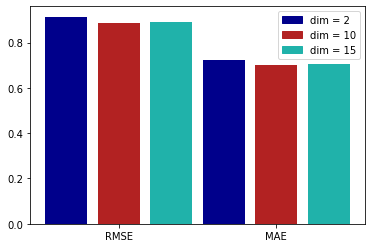

In [65]:
errors = RMSEs + MAEs
labels = ('RMSE', 'MAE')
y_pos = np.arange(len(errors))

plt.bar(y_pos, errors, color = ('darkblue', 'firebrick', 'lightseagreen'))
colors = {'dim = 2': 'darkblue', 
          'dim = 10': 'firebrick', 
          'dim = 15': 'lightseagreen'}         
labels2 = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels2]
plt.legend(handles, labels2)
plt.xticks([1, 4], labels)
plt.savefig('dimtest.png')
plt.show()

In [38]:
# calculate average train RMSE
train_RMSE = np.mean([training_processes[0][5][1],
                      training_processes[1][5][1],
                      training_processes[2][5][1],
                      training_processes[3][5][1],
                      training_processes[4][5][1]])
train_RMSE

0.835916843798166

In [39]:
# calculate average train MAE
train_MAE = np.mean([training_processes[0][5][2],
                     training_processes[1][5][2],
                     training_processes[2][5][2],
                     training_processes[3][5][2],
                     training_processes[4][5][2]])
train_MAE

0.6555779424174111

In [40]:
# calculate average test RMSE and MAE
test_RMSE = test_results.mean(axis = 0)[0]
test_MAE = test_results.mean(axis = 0)[1]
print(test_RMSE, test_MAE)

0.8871714368214019 0.7010841666807306


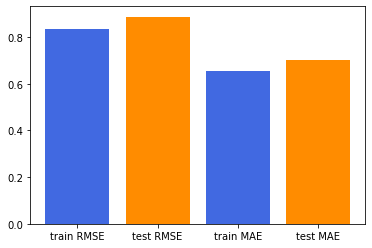

In [41]:
# visualize errors
errors = [train_RMSE, test_RMSE, train_MAE, test_MAE]
labels = ('train RMSE', 'test RMSE', 'train MAE', 'test MAE')
y_pos = np.arange(len(labels))

plt.bar(y_pos, errors, color = ('royalblue', 'darkorange'))
plt.xticks(y_pos, labels)
plt.savefig('error_bars.png')
plt.show()

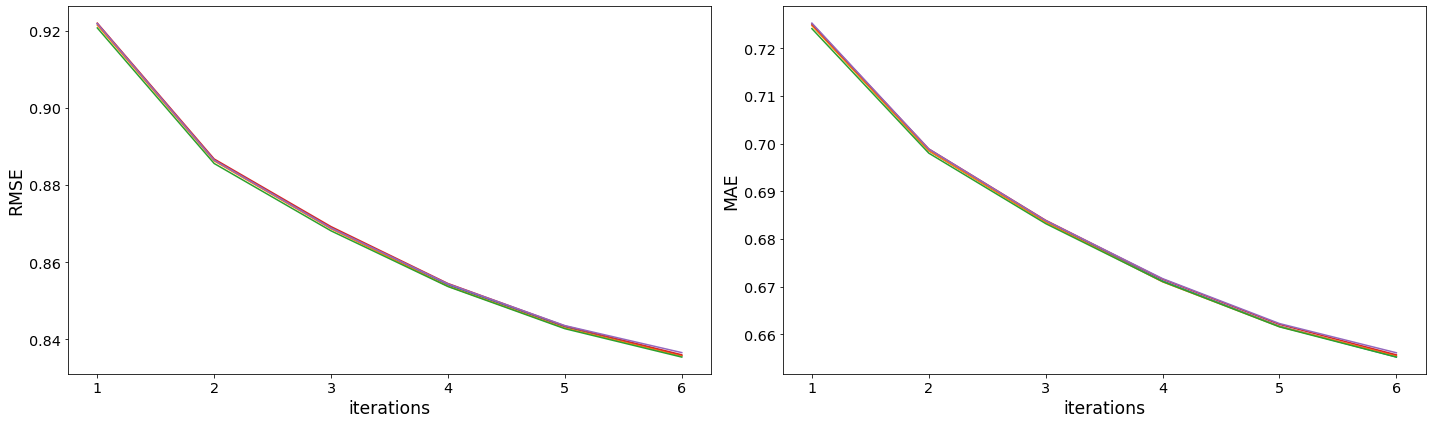

In [42]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))  
for iter in range(5):
    axes[0].plot([i[0] for i in training_processes[0]], [i[1] for i in training_processes[iter]])
    axes[0].set_xlabel('iterations', size = 'xx-large')
    axes[0].set_ylabel('RMSE', size = 'xx-large')
    axes[0].tick_params(labelsize = 'x-large')

for iter in range(5):
    axes[1].plot([i[0] for i in training_processes[0]], [i[2] for i in training_processes[iter]])
    axes[1].set_xlabel('iterations', size = 'xx-large')
    axes[1].set_ylabel('MAE', size = 'xx-large')
    axes[1].tick_params(labelsize = 'x-large')
fig.tight_layout()

In [43]:
fig.savefig('UV_train.png')

#### Matrix Factorization

In [22]:
def ComputeRMSE(R, U, M):

    xs, ys = R.nonzero()
    prediction = U.dot(M.T)
    prediction[prediction > 5] = 5
    prediction[prediction < 1] = 1
    SE = 0
    i = 0

    for x, y in zip(xs, ys):
        error = R[x, y] - prediction[x, y]
        SE += pow(error, 2)
        i += 1
    
    return np.sqrt(SE/i)

def ComputeMAE(R, U, M):

    xs, ys = R.nonzero()
    prediction = U.dot(M.T)
    AE = 0
    i = 0

    for x, y in zip(xs, ys):
        error = R[x, y] - prediction[x, y]
        AE += abs(error)
        i += 1
    
    return (AE/i)

In [45]:
def MF(R, num_factors = 10, num_iter = 75, regularization = 0.05, learn_rate = 0.005, seed = 2020):
    
    num_users, num_items = R.shape
    np.random.seed(seed)
    U = np.random.normal(size = (num_users, num_factors))
    M = np.random.normal(size = (num_items, num_factors))

    samples = [(i, j, R[i, j])
               for i in range(num_users)
               for j in range(num_items)
               if R[i, j] > 0]
    
    training_process = []
    for iter in range(num_iter):
        np.random.shuffle(samples)
        
        for i, j, r in samples:
            prediction = U[i,:].dot(M[j,:].T)
            if prediction > 5:
                prediction = 5
            if prediction < 1:
                prediction = 1
            e = (r - prediction)
            
            # Update the weights
            U[i,:] += learn_rate * (2 * e * M[j,:] - regularization * U[i,:])
            M[j,:] += learn_rate * (2 * e * U[i,:] - regularization * M[j,:])
        
        RMSE = ComputeRMSE(R, U, M)
        MAE = ComputeMAE(R, U, M)
        training_process.append((iter, RMSE, MAE))
        
        # Iteration progress messages
        if (iter+1) % 10 == 0:
            print("Iteration: %d ; RMSE = %.4f ; MAE %.4f"   % (iter+1, RMSE, MAE))
            
        # Terminal condition
        if iter > 1:
            if training_process[iter][1] >= training_process[iter-1][1] >= training_process[iter-2][1]:
                break

    out = {'training_process': training_process, 'U' : U, 'M' : M}
    return(out)

In [47]:
start = time.time()
# prepare cross validation
kfold = KFold(5, shuffle = True, random_state = 2020)
results = np.zeros((5,2))

# enumerate splits
i = 0
for train_index, test_index in kfold.split(ratings):
    train_ratings = ratings.copy()
    train_ratings.iloc[test_index,2] = 0
    R_train = np.array(train_ratings.pivot(index = 'UserID', columns ='MovieID', values = 'Rating').fillna(0))
    MF_fit = MF(R_train)
    
    test_ratings = ratings.copy()
    test_ratings.iloc[train_index,2] = 0
    R_test = np.array(test_ratings.pivot(index = 'UserID', columns ='MovieID', values = 'Rating').fillna(0))

    RMSE_test = ComputeRMSE(R_test, MF_fit['U'], MF_fit['M'])
    MAE_test = ComputeMAE(R_test, MF_fit['U'], MF_fit['M'])
    
    results[i, 0] = RMSE_test
    results[i, 1] = MAE_test
    print(results)
    i = i + 1
    training_processes.append(MF_fit['training_process'])

print(results.mean(0))
end = time.time()
print(end - start)

Iteration: 10 ; RMSE = 0.8723 ; MAE 0.6921
Iteration: 20 ; RMSE = 0.8378 ; MAE 0.6632
Iteration: 30 ; RMSE = 0.8151 ; MAE 0.6447
Iteration: 40 ; RMSE = 0.7992 ; MAE 0.6324
Iteration: 50 ; RMSE = 0.7885 ; MAE 0.6239
Iteration: 60 ; RMSE = 0.7809 ; MAE 0.6171
Iteration: 70 ; RMSE = 0.7757 ; MAE 0.6130
[[0.77375885 0.61152327 0.87958543 0.69102691]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]]
Iteration: 10 ; RMSE = 0.8725 ; MAE 0.6922
Iteration: 20 ; RMSE = 0.8368 ; MAE 0.6624
Iteration: 30 ; RMSE = 0.8141 ; MAE 0.6439
Iteration: 40 ; RMSE = 0.7992 ; MAE 0.6319
Iteration: 50 ; RMSE = 0.7895 ; MAE 0.6247
Iteration: 60 ; RMSE = 0.7808 ; MAE 0.6172
Iteration: 70 ; RMSE = 0.7762 ; MAE 0.6135
[[0.77375885 0.61152327 0.87958543 0.69102691]
 [0.77472932 0.6123126  0.88196797 0.69217913]
 [0.         0.         0.         0.        ]
 [0.         0.      

In [52]:
pd.DataFrame(training_processes).to_csv("training_processes.csv")

In [53]:
pd.DataFrame(results).to_csv("results.csv")

In [121]:
# calculate train RMSE
np.mean([training_processes[0][74][1],
        training_processes[1][74][1],
        training_processes[2][74][1],
        training_processes[3][74][1],
        training_processes[4][74][1]])

0.09340214434172049

In [120]:
# calculate train MAE
np.mean([training_processes[0][74][2],
        training_processes[1][74][2],
        training_processes[2][74][2],
        training_processes[3][74][2],
        training_processes[4][74][2]])

0.18566775475815675

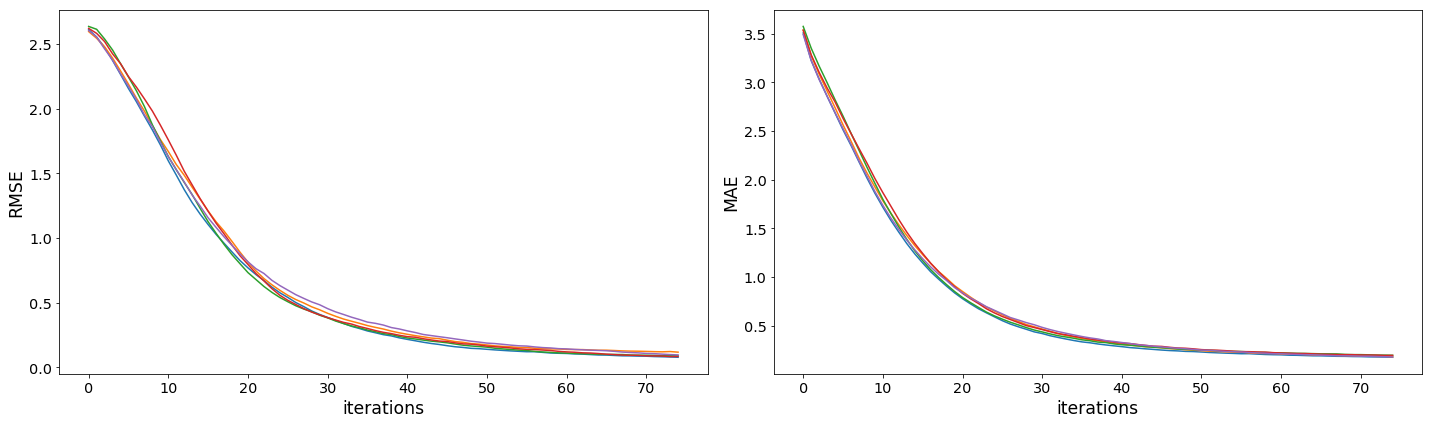

In [84]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))  
for iter in range(5):
    axes[0].plot([i[0] for i in training_processes[0]], [i[1] for i in training_processes[iter]])
    axes[0].set_xlabel('iterations', size = 'xx-large')
    axes[0].set_ylabel('RMSE', size = 'xx-large')
    axes[0].tick_params(labelsize = 'x-large')

for iter in range(5):
    axes[1].plot([i[0] for i in training_processes[0]], [i[2] for i in training_processes[iter]])
    axes[1].set_xlabel('iterations', size = 'xx-large')
    axes[1].set_ylabel('MAE', size = 'xx-large')
    axes[1].tick_params(labelsize = 'x-large')
fig.tight_layout()

In [86]:
fig.savefig('MV_train.png')